## Removal of exceptions according to the Tukey method (IQR1.5)

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Ensure the price column is treated as a float
# Assuming 'price_per_night' is already numerical
df['price_per_night'] = df['price_per_night'].astype(float)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price_per_night'].quantile(0.25)
Q3 = df['price_per_night'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

df_no_outliers.to_csv('./20_06_hotels_data_cleaned.csv', index=False)

df_no_outliers.T

Original DataFrame shape: (25796, 22)
DataFrame shape after removing outliers: (23683, 22)


,0,1,2,3,4,5,6,7,8,9,...,25786,25787,25788,25789,25790,25791,25792,25793,25794,25795
name,U.S. Pacific Hotel,Hudson Yard 408,Carlton Arms Hotel,Bowery Grand Hotel,West Side YMCA,Hotel Moca NYC,"The Historic Mayfair Hotel Times Square, Ascen...","Hotel Shocard Broadway, Times Square",Solita Soho Hotel,YOTEL New York Times Square,...,Nolitan Hotel SoHo - New York,Hilton Garden Inn New York Times Square North,Chelsea Pines Inn,"Distrikt Hotel New York City, Tapestry Collect...",Henn na Hotel New York,Fairfield Inn & Suites by Marriott New York Ma...,Freehand New York,American Dream Guest House,Courtyard by Marriott Times Square West,Radio City Apartments
location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,5.6,4.9,7.4,3.5,6.6,4.4,8.5,7.3,7.7,7.3,...,8.0,7.7,7.9,7.5,8.5,8.2,7.8,9.0,8.2,8.5
reviews,2437.0,42.0,1978.0,1406.0,13556.0,97.0,747.0,2390.0,1137.0,6096.0,...,1388.0,2811.0,1739.0,345.0,3104.0,6793.0,1877.0,4.0,2796.0,5980.0
room_type,Standard Double (No Window),Double Room,Double Room with Shared Bathroom,Standard Single Room with Shared Bathroom,Bunk Bed Room with Shared Bathroom,Deluxe Queen Room,Double Room with Step-In Shower - Disability A...,Queen Room,Standard Queen Room,Premium Queen,...,Deluxe Queen Room,King Room,Standard Double Room,Queen Room,Handicap Accessible Room,1 King Bed,Premium Queen,Double Room with Shared Bathroom,King Room,Queen Studio
bed_type,New YorkShow on map5.7 km from centreMetro ac...,New YorkShow on map1.9 km from centreMetro ac...,New YorkShow on map3.1 km from centreMetro ac...,New YorkShow on map5.6 km from centreMetro ac...,New YorkShow on map350 m from centreMetro access,New YorkShow on map9.9 km from centreMetro ac...,New YorkShow on map0.8 km from centreMetro ac...,New YorkShow on map1.5 km from centreMetro ac...,New YorkShow on map5.6 km from centreMetro ac...,New YorkShow on map1.5 km from centre,...,New YorkShow on map5.4 km from centreMetro ac...,New YorkShow on map1.3 km from centreMetro ac...,New YorkShow on map3.6 km from centreMetro ac...,New YorkShow on map1.6 km from centreMetro ac...,New YorkShow on map1.9 km from centreMetro ac...,New YorkShow on map1.9 km from centreMetro ac...,New YorkShow on map3.1 km from centreMetro ac...,New YorkShow on map1.1 km from centre,New YorkShow on map1.8 km from centreMetro ac...,New YorkShow on map0.9 km from centreMetro ac...
price,129.0,158.0,161.0,189.0,169.0,198.0,199.0,234.0,209.0,213.0,...,1499.0,1501.0,1503.0,1504.0,1505.0,1506.0,1511.0,1511.0,1514.0,1515.0
availability,"1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults","1 night, 2 adults",...,"5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults","5 nights, 2 adults"
url,https://www.booking.com/hotel/us/us-pacific.en...,https://www.booking.com/hotel/us/hudson-new-yo...,https://www.booking.com/hotel/us/carlton-arms....,https://www.booking.com/hotel/us/bowery-grand....,https://www.booking.com/hotel/us/west-side-ymc...,https://www.booking.com/hotel/us/moca-nyc.en-g...,https://www.booking.com/hotel/us/mayfair-new-y...,https://www.booking.com/hotel/us/41-at-times-s...,https://www.booking.com/hotel/us/solita-soho-n...,https://www.booking.com/hotel/us/yotel-new-yor...,...,https://www.booking.com/hotel/us/nolitan.en-gb...,https://www.booking.com/hotel/us/hilton-garden...,https://www.booking.com/hotel/us/chelsea-pines...,https://www.booking.com/hotel/us/distrikt-new-...,https://www.booking.com/hotel/us/henn-na-new-y...,https://www.booking.com/hotel/us/fairfield-inn...,https://www.booking.com/hotel/us/freehand-new-...,https://www.booking.com/hotel/us/american-drea...,https://www.booking.com/hotel/us/new-york-manh...,https://www.booking.com/hotel/us/radio-city-ap...
star_rating,1.0,NaN,2.0,

# Feature engineering  

##  room level rating

In [3]:


# Display the unique room types to identify keywords
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')
unique_room_types = df['room_type'].unique()

# Create a list of keywords for room rate categorization
keywords = [
    ('standard', 1), ('single', 1), ('twin', 1), ('double', 1),
    ('deluxe', 2), ('superior', 2), ('queen', 2), ('economy', 2),
    ('executive', 3), ('king', 3), ('studio', 3), ('family', 3),
    ('suite', 4), ('junior suite', 4), ('mini-suite', 4), ('junior', 4),
    ('master suite', 5), ('presidential', 5), ('penthouse', 5), ('villa', 5),
    ('luxury', 5), ('aparthotel', 4), ('apart-style', 4),
    ('connecting', 3), ('adjoining', 3), ('adjacent', 3), ('accessible', 3),
    ('resort', 5), ('boutique', 5), ('lodge', 2)
]

# Assign room rates based on keywords
def assign_room_rate(room_type):
    room_type_lower = str(room_type).lower()  # Convert to lowercase
    max_rate = 0  # Default rate
    for keyword, rate in keywords:
        if keyword in room_type_lower:
            max_rate = max(max_rate, rate)
    return max_rate

df['room_rate'] = df['room_type'].apply(assign_room_rate)
df.to_csv('./20_06_hotels_data_cleaned.csv', index=False)


 ## categorize_neighborhood

In [5]:
df_unique_hotels = df.drop_duplicates(subset='name')
# Count the number of unique neighborhoods
num_neighborhoods = df_unique_hotels['neighborhood'].nunique()
# Print the result
print(f'There are {num_neighborhoods} unique neighborhoods in the data.')


# Count the number of hotels in each neighborhood
hotels_per_neighborhood = df.groupby('neighborhood').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_neighborhood)


There are 25 unique neighborhoods in the data.
                                         neighborhood  hotel_count
0                                             Chelsea         2485
1                                           Chinatown          806
2                                         East Harlem          312
3                                        East Village           50
4                                   Flatiron District          279
5                                    Governors Island            3
6                                            Gramercy          193
7                                   Greenwich Village          153
8                                              Harlem         1020
9                                      Hell's Kitchen         3198
10                                       Hudson Yards          325
11                                           Kips Bay          111
12                                       Little Italy          113
13             

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Clean neighborhood column
df['neighborhood'] = df['neighborhood'].str.replace(r'New YorkShow on map.*', 'Other Manhattan', regex=True)

# Function to categorize neighborhoods
def categorize_neighborhood(neighborhood):
    downtown = ['Chinatown', 'East Village', 'Flatiron District', 'Greenwich Village', 'Lower East Side', 'NoMad', 'SoHo', 'Tribeca', 'Union Square', 'Little Italy']
    midtown = ['Chelsea', 'Gramercy', "Hell's Kitchen", 'Hudson Yards', 'Kips Bay', 'Midtown East', 'Murray Hill']
    uptown = ['East Harlem', 'Harlem', 'Upper East Side', 'Upper West Side', 'Washington Heights']
    
    if neighborhood in downtown:
        return 'Downtown Manhattan'
    elif neighborhood in midtown:
        return 'Midtown Manhattan'
    elif neighborhood in uptown:
        return 'Uptown Manhattan'
    elif neighborhood == 'Governors Island':
        return 'Governors Island'
    elif neighborhood == 'Brooklyn':
        return 'Brooklyn'
    elif neighborhood == 'Queens':
        return 'Queens'
    elif neighborhood == 'Bronx':
        return 'Bronx'
    elif neighborhood == 'Staten Island':
        return 'Staten Island'
    elif neighborhood == 'Manhattan':
        return 'Other Manhattan'
    else:
        return 'Unknown/Other'

# Apply the function to create a new column
df['neighborhood_category'] = df['neighborhood'].apply(categorize_neighborhood)

# Save the updated DataFrame to a new CSV file
df.to_csv('./20_06_hotels_data_cleaned.csv', index=False)

# Count the number of hotels in each new neighborhood category
hotels_per_new_neighborhood = df.groupby('neighborhood_category').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_new_neighborhood)




  neighborhood_category  hotel_count
0    Downtown Manhattan         4756
1      Governors Island            3
2     Midtown Manhattan         8065
3       Other Manhattan         8049
4         Unknown/Other           37
5      Uptown Manhattan         2773


Sample data from the DataFrame:
    neighborhood_category   price  LOS  price_per_night
0      Downtown Manhattan   129.0    1       129.000000
1       Midtown Manhattan   158.0    1       158.000000
2       Midtown Manhattan   161.0    1       161.000000
3      Downtown Manhattan   189.0    1       189.000000
4        Uptown Manhattan   169.0    1       169.000000
..                    ...     ...  ...              ...
495      Uptown Manhattan  1091.0    3       363.666667
496       Other Manhattan  1109.0    3       369.666667
497       Other Manhattan  1224.0    3       408.000000
498       Other Manhattan  1116.0    3       372.000000
499    Downtown Manhattan  1119.0    3       373.000000

[500 rows x 4 columns]
Average price per night for each neighborhood:
  neighborhood_category  price_per_night
0    Downtown Manhattan       260.722077
1      Governors Island       354.000000
2     Midtown Manhattan       269.301225
3       Other Manhattan       272.010639
4         Unknown/Ot

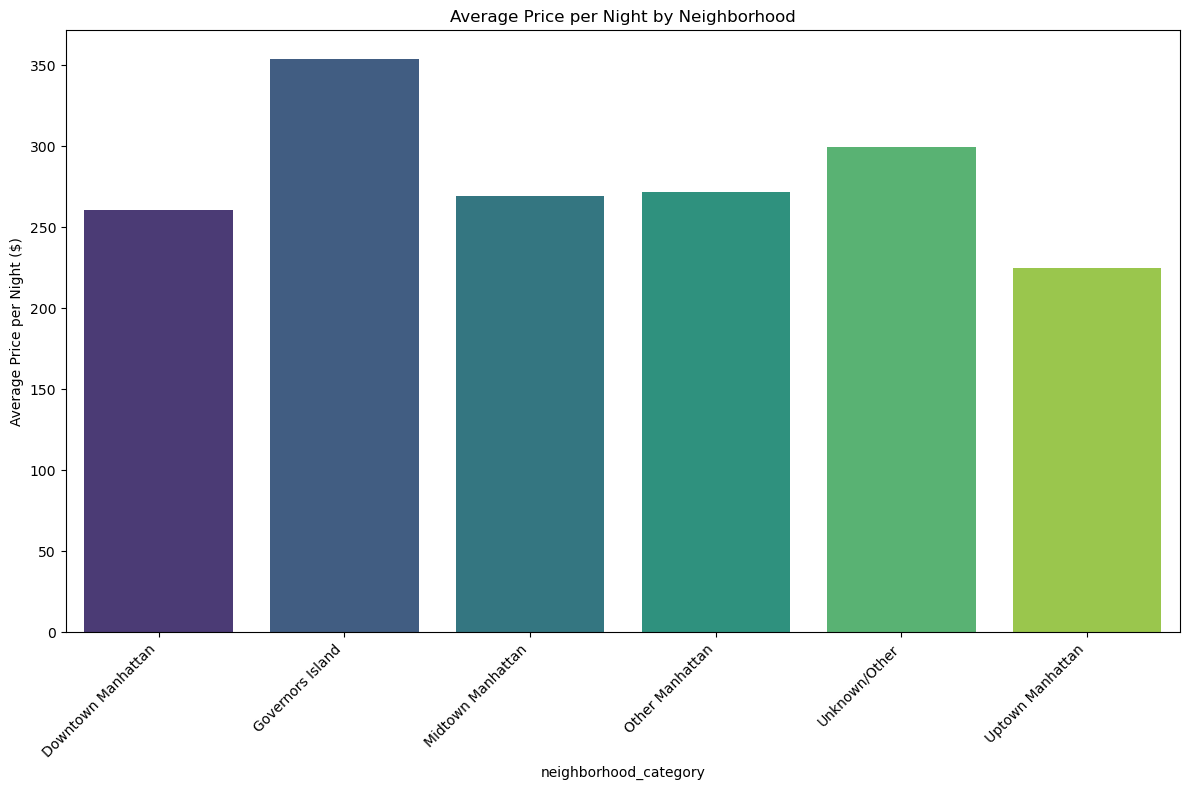

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Check the price_per_night column
print("Sample data from the DataFrame:")
print(df[['neighborhood_category', 'price', 'LOS', 'price_per_night']].head(500))

# Ensure that the necessary columns exist and are in the correct format
df['price_per_night'] = df['price_per_night'].astype(float)
df['neighborhood_category'] = df['neighborhood_category'].astype(str)

# Calculate the average price per night for each neighborhood
avg_price_per_night = df.groupby('neighborhood_category')['price_per_night'].mean().reset_index()

# Check the average price per night
print("Average price per night for each neighborhood:")
print(avg_price_per_night)

# Plotting the average price per night for each neighborhood
plt.figure(figsize=(12, 8))
sns.barplot(x='neighborhood_category', y='price_per_night', data=avg_price_per_night, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price per Night by Neighborhood')
plt.xlabel('neighborhood_category')
plt.ylabel('Average Price per Night ($)')
plt.tight_layout()
plt.show()


## Data visualization - distributions

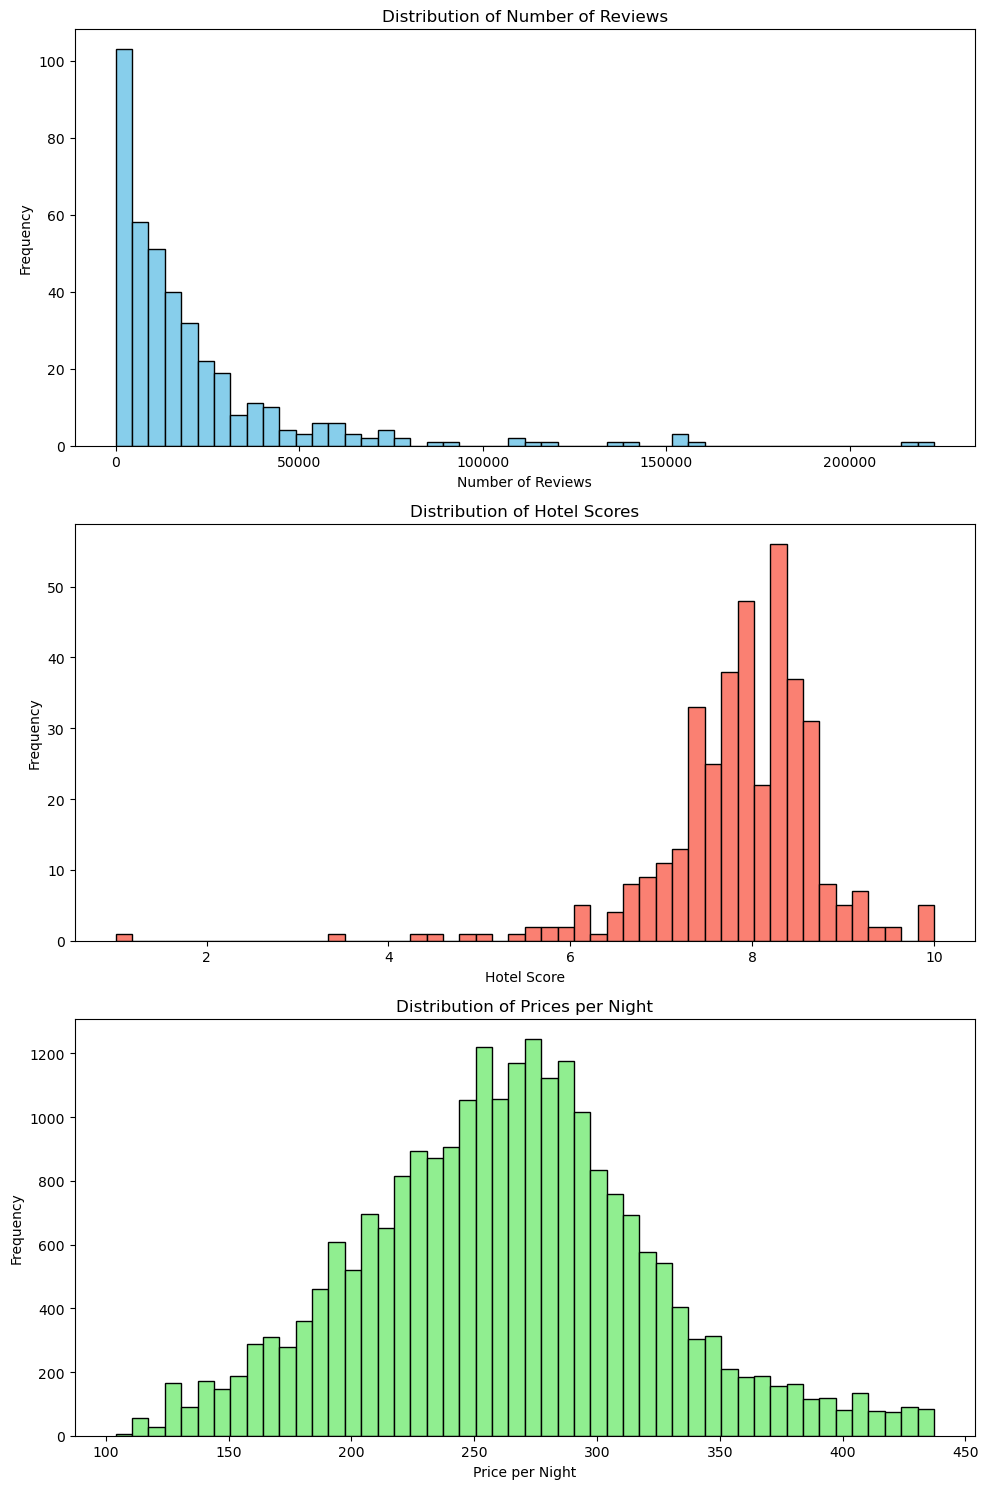

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


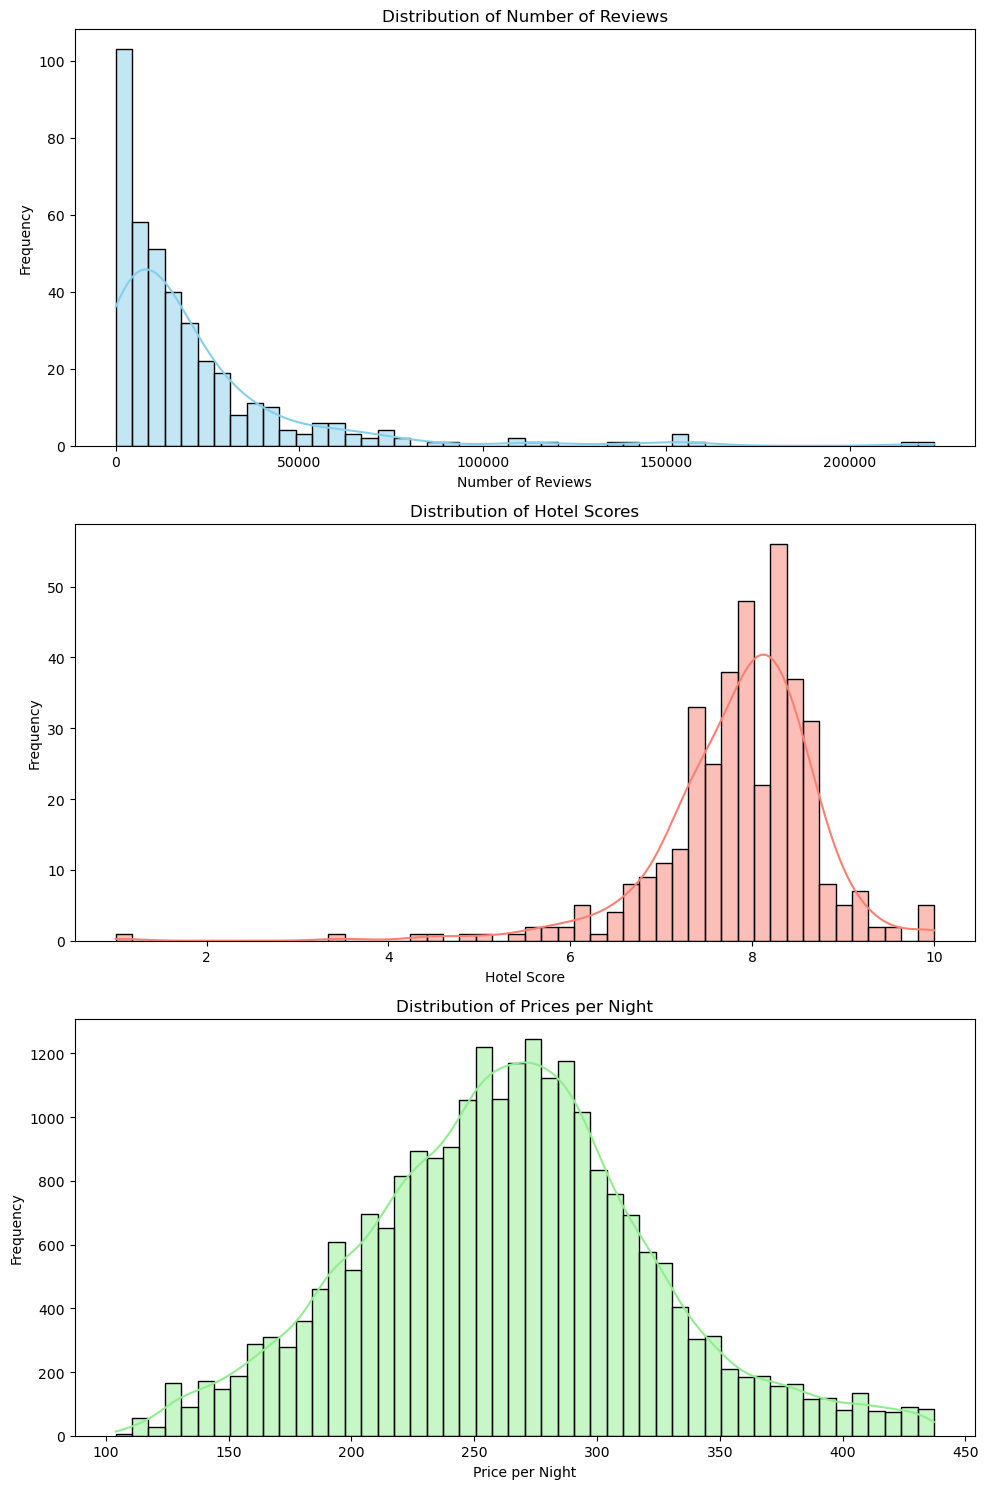

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Ensure the reviews column is treated as a string and clean it
df['reviews'] = df['reviews'].astype(str).str.replace(r'\D', '', regex=True)
df['reviews'] = df['reviews'].replace('', '0').astype(int)  # Replace empty strings with '0' and convert to int

# Clean the necessary columns
df['score'] = df['score'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df['price'] = df['price'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df['price_per_night'] = df['price_per_night'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

# Create a DataFrame where each hotel appears only once
df_unique_hotels = df.drop_duplicates(subset='name')

# Plot distributions using Matplotlib for unique hotels
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Number of reviews distribution
axs[0].hist(df_unique_hotels['reviews'], bins=50, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Number of Reviews')
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Frequency')

# Hotel score distribution
axs[1].hist(df_unique_hotels['score'], bins=50, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of Hotel Scores')
axs[1].set_xlabel('Hotel Score')
axs[1].set_ylabel('Frequency')

# Price per night distribution
axs[2].hist(df['price_per_night'], bins=50, color='lightgreen', edgecolor='black')
axs[2].set_title('Distribution of Prices per Night')
axs[2].set_xlabel('Price per Night')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot distributions using Seaborn for unique hotels
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Number of reviews distribution
sns.histplot(df_unique_hotels['reviews'], bins=50, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Number of Reviews')
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Frequency')

# Hotel score distribution
sns.histplot(df_unique_hotels['score'], bins=50, kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Distribution of Hotel Scores')
axs[1].set_xlabel('Hotel Score')
axs[1].set_ylabel('Frequency')

# Price per night distribution
sns.histplot(df['price_per_night'], bins=50, kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title('Distribution of Prices per Night')
axs[2].set_xlabel('Price per Night')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Data visualization - the connections between the parameters and the price and between the parameters. We will try to understand if there are strong connections to help us make a decision later

Data Types in Numeric DataFrame:
score                float64
reviews              float64
star_rating          float64
Free_cancellation      int64
TTT                    int64
Breakfast              int64
km_from_center       float64
LOS                    int64
price_per_night      float64
room_rate              int64
dtype: object

First Few Rows of Numeric DataFrame:
   score  reviews  star_rating  Free_cancellation  TTT  Breakfast  \
0    5.6   2437.0          1.0                  0    1          0   
2    7.4   1978.0          2.0                  0    1          0   
3    3.5   1406.0          1.0                  0    1          0   
4    6.6  13556.0          3.0                  0    1          0   
5    4.4     97.0          3.0                  0    1          0   

   km_from_center  LOS  price_per_night  room_rate  
0            5.70    1            129.0          1  
2            3.10    1            161.0          1  
3            5.60    1            189.0          1 

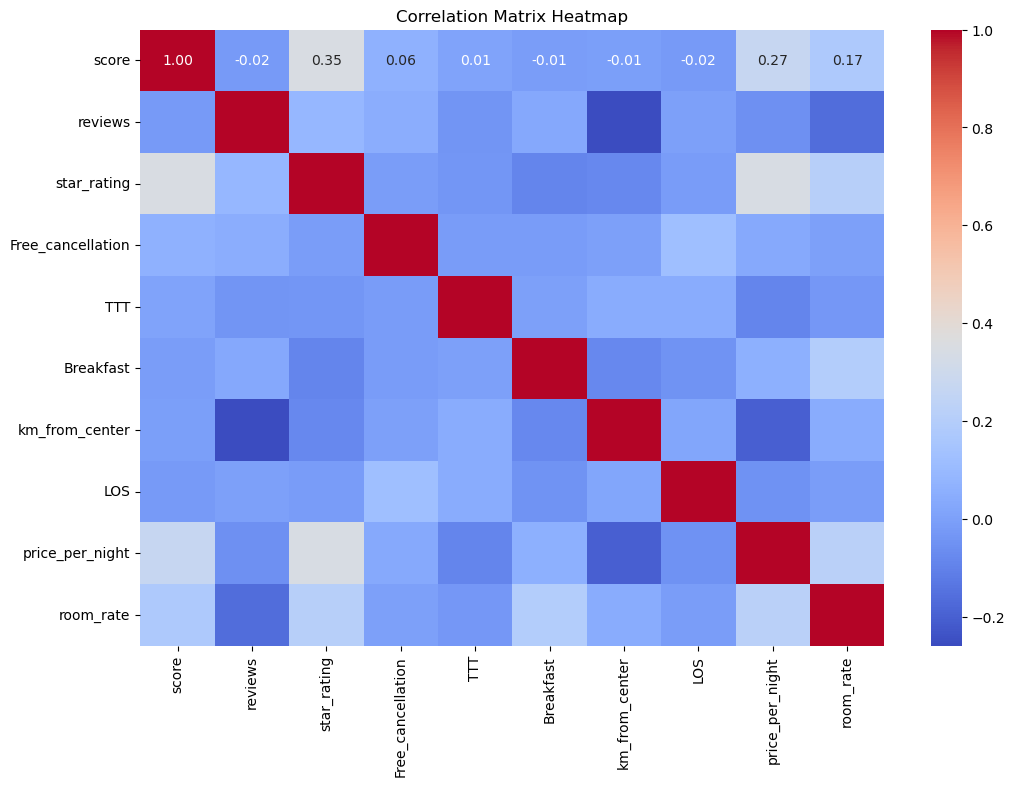

Price per Night Correlations:
price_per_night      1.000000
star_rating          0.344965
score                0.270126
room_rate            0.219071
Breakfast            0.059311
Free_cancellation    0.032065
LOS                 -0.048256
reviews             -0.056551
TTT                 -0.091529
km_from_center      -0.202294
Name: price_per_night, dtype: float64


<Figure size 800x600 with 0 Axes>

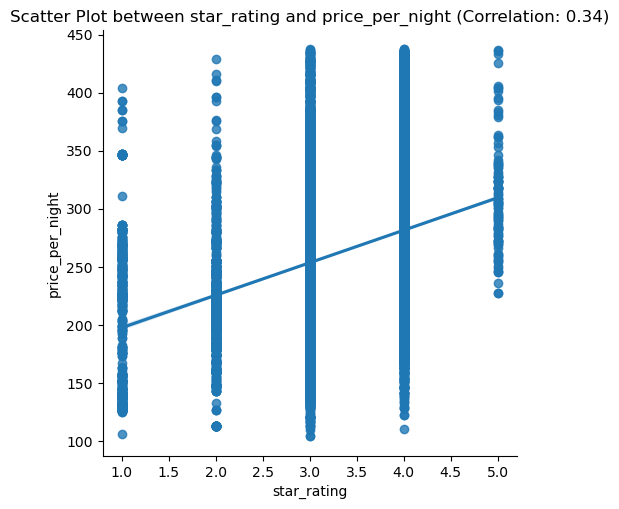

<Figure size 800x600 with 0 Axes>

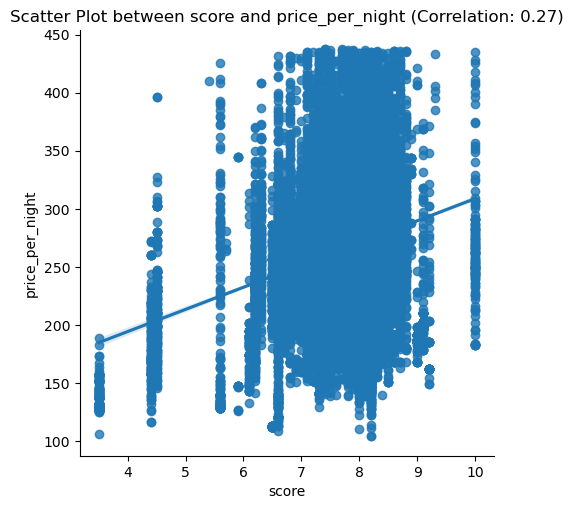

<Figure size 800x600 with 0 Axes>

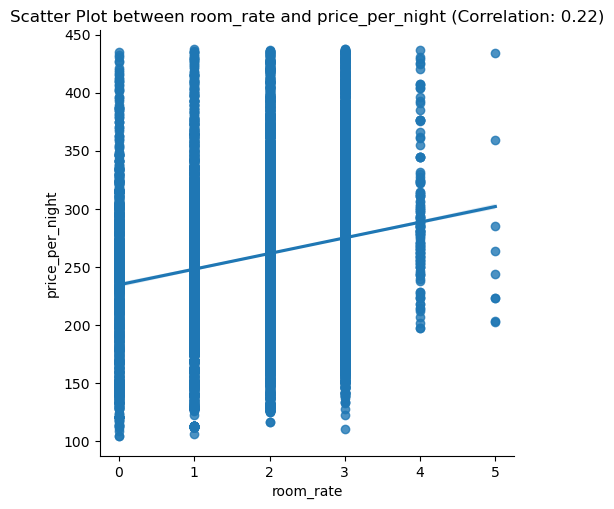

<Figure size 800x600 with 0 Axes>

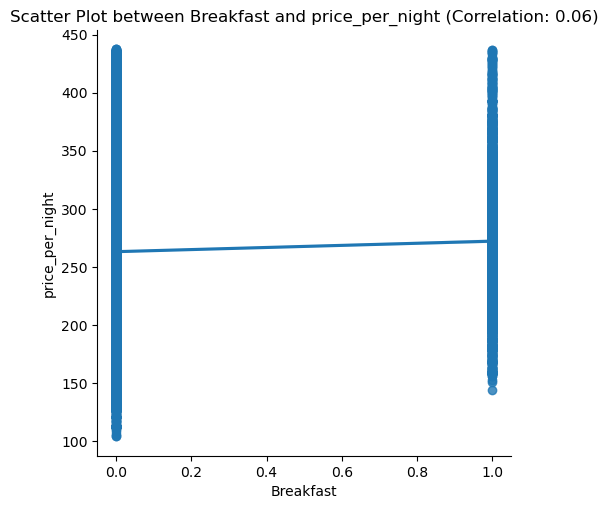

<Figure size 800x600 with 0 Axes>

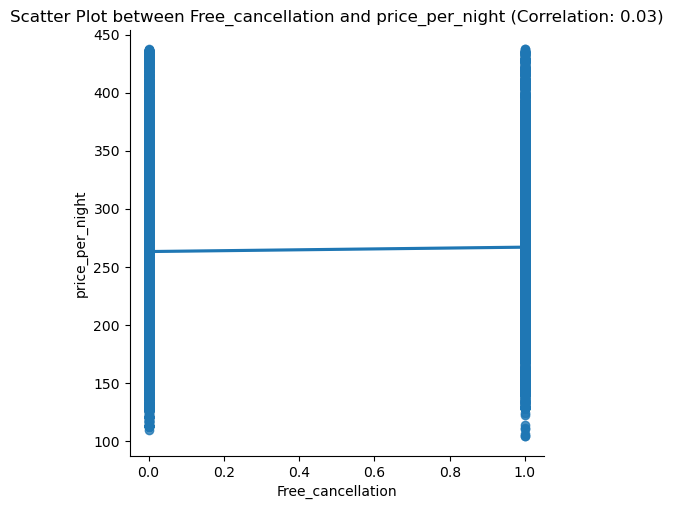

<Figure size 800x600 with 0 Axes>

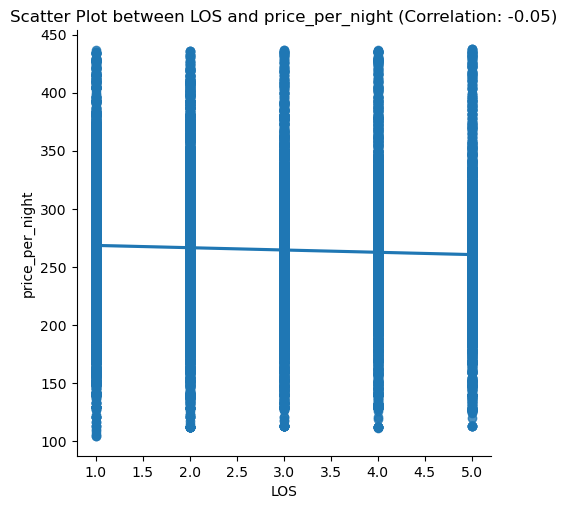

<Figure size 800x600 with 0 Axes>

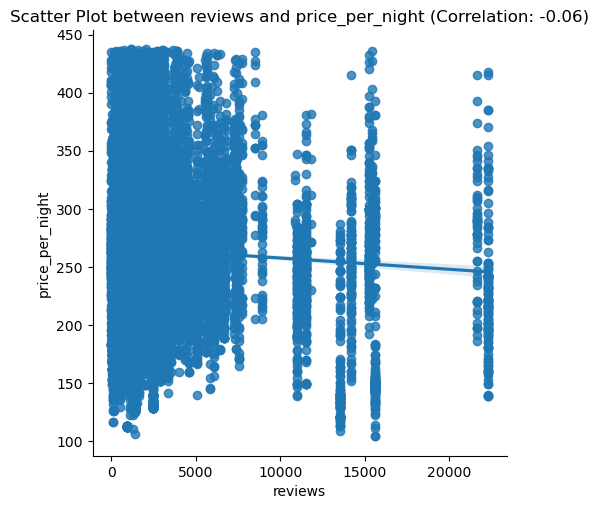

<Figure size 800x600 with 0 Axes>

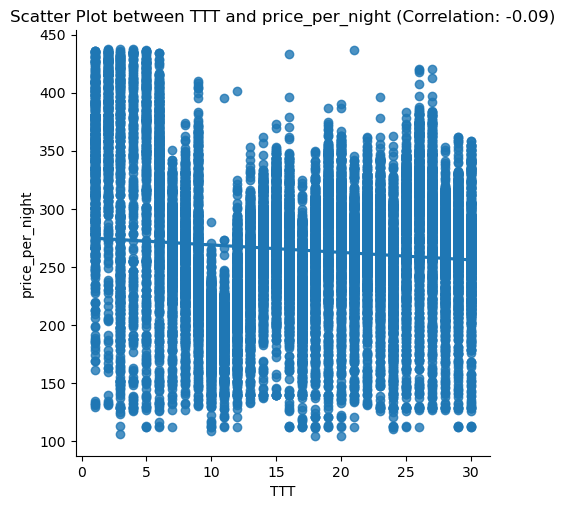

<Figure size 800x600 with 0 Axes>

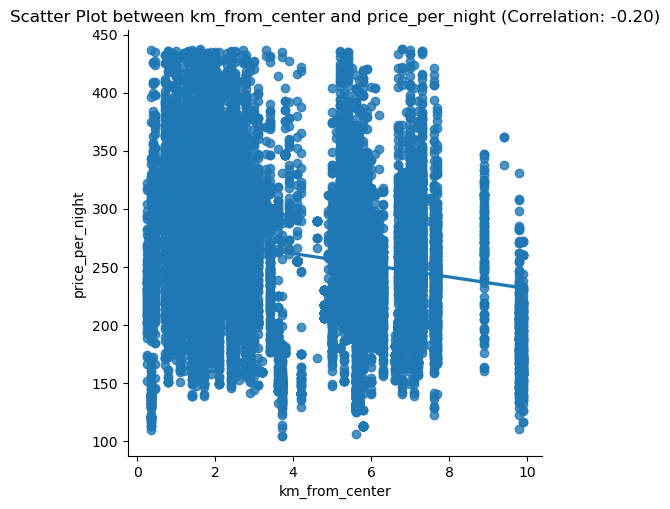

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')


# Drop 'location_rating' and 'price' columns if they exist
df_temp = df.drop(columns=['location_rating', 'price','location','Limited_rooms','index'], errors='ignore')

# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=[float, int])

# Remove rows with null values in numeric columns
numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe
print("Data Types in Numeric DataFrame:")
print(numeric_df.dtypes)
print("\nFirst Few Rows of Numeric DataFrame:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Visualize the strong relationships
    # Identify strong correlations (e.g., correlation coefficient > 0.5 or < -0.5)
    strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].stack().reset_index()
    strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
    strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Plot the relationships for strong correlations
    for _, row in strong_correlations.iterrows():
        feature1 = row['Feature 1']
        feature2 = row['Feature 2']
        correlation = row['Correlation']
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=numeric_df, x=feature1, y=feature2)
        plt.title(f'Scatter Plot between {feature1} and {feature2} (Correlation: {correlation:.2f})')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

    # Specifically visualize the relationship between 'price_per_night' and other parameters
    if 'price_per_night' in numeric_df.columns:
        price_correlations = correlation_matrix['price_per_night'].sort_values(ascending=False)
        print("Price per Night Correlations:")
        print(price_correlations)

        # Plot the relationships for 'price_per_night'
        for feature in price_correlations.index:
            if feature != 'price_per_night':
                plt.figure(figsize=(8, 6))
                sns.lmplot(data=numeric_df, x=feature, y='price_per_night')
                plt.title(f'Scatter Plot between {feature} and price_per_night (Correlation: {price_correlations[feature]:.2f})')
                plt.xlabel(feature)
                plt.ylabel('price_per_night')
                plt.show()
    else:
        print("Column 'price_per_night' not found in the numerical columns.")


Data Types in Numeric DataFrame:
score                float64
reviews              float64
star_rating          float64
Free_cancellation      int64
TTT                    int64
Breakfast              int64
km_from_center       float64
LOS                    int64
price_per_night      float64
room_rate              int64
dtype: object

First Few Rows of Numeric DataFrame:
   score  reviews  star_rating  Free_cancellation  TTT  Breakfast  \
0    5.6   2437.0          1.0                  0    1          0   
2    7.4   1978.0          2.0                  0    1          0   
3    3.5   1406.0          1.0                  0    1          0   
4    6.6  13556.0          3.0                  0    1          0   
5    4.4     97.0          3.0                  0    1          0   

   km_from_center  LOS  price_per_night  room_rate  
0            5.70    1            129.0          1  
2            3.10    1            161.0          1  
3            5.60    1            189.0          1 

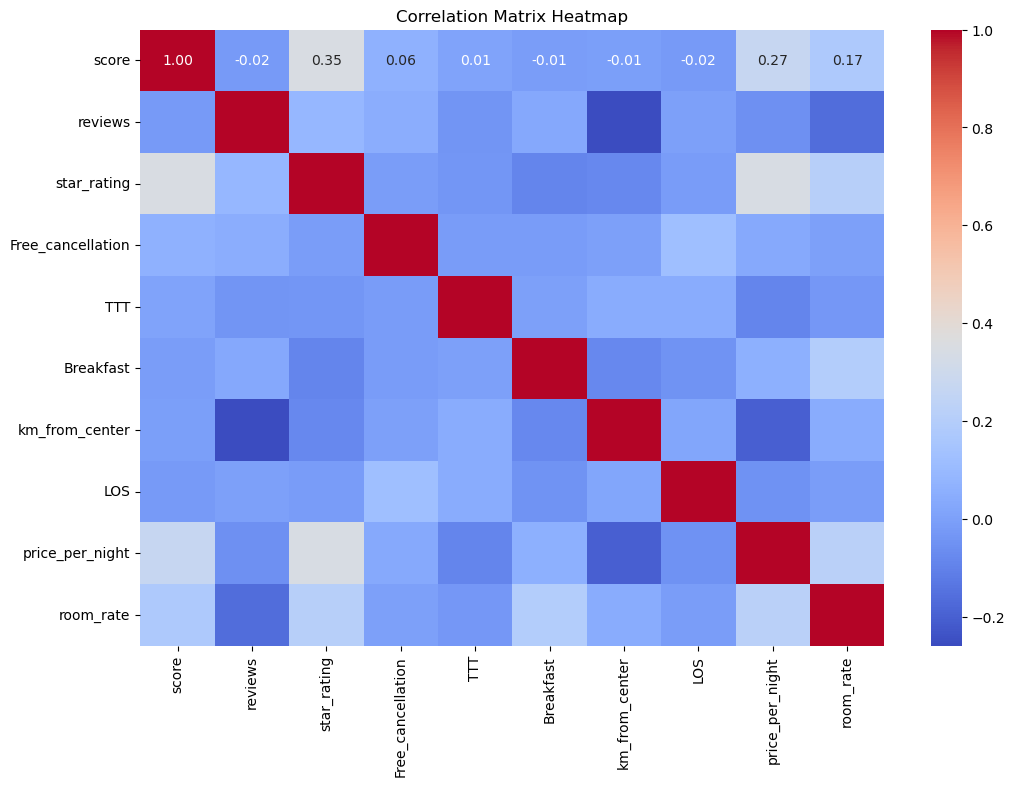

Price per Night Correlations:
price_per_night      1.000000
star_rating          0.344965
score                0.270126
room_rate            0.219071
Breakfast            0.059311
Free_cancellation    0.032065
LOS                 -0.048256
reviews             -0.056551
TTT                 -0.091529
km_from_center      -0.202294
Name: price_per_night, dtype: float64


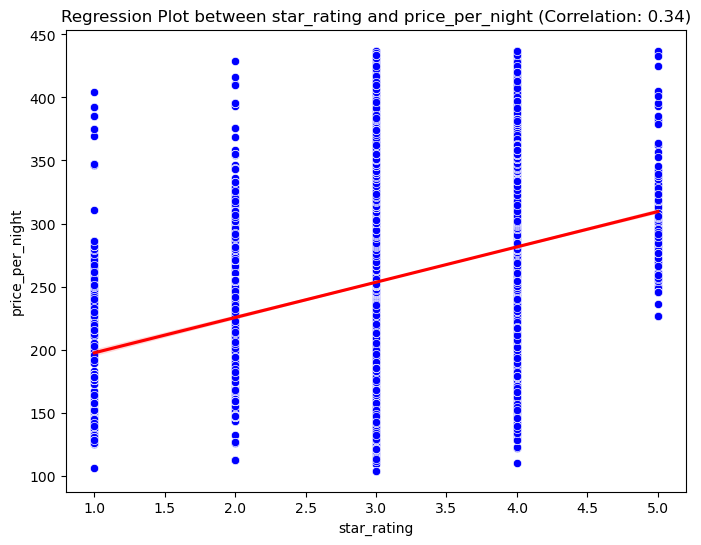

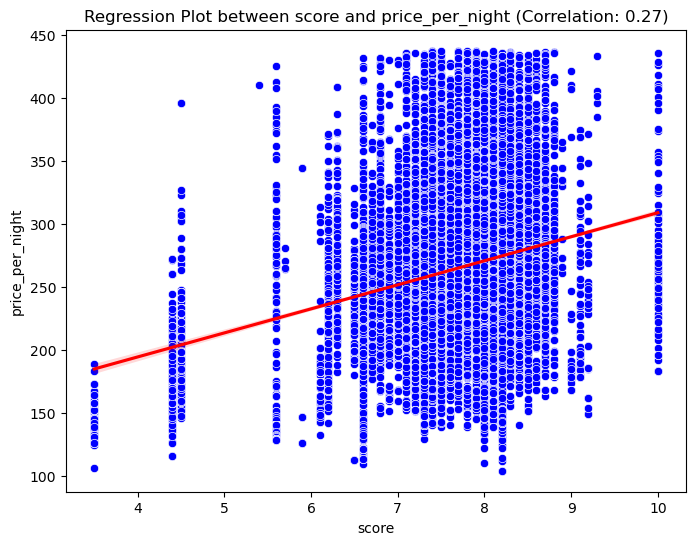

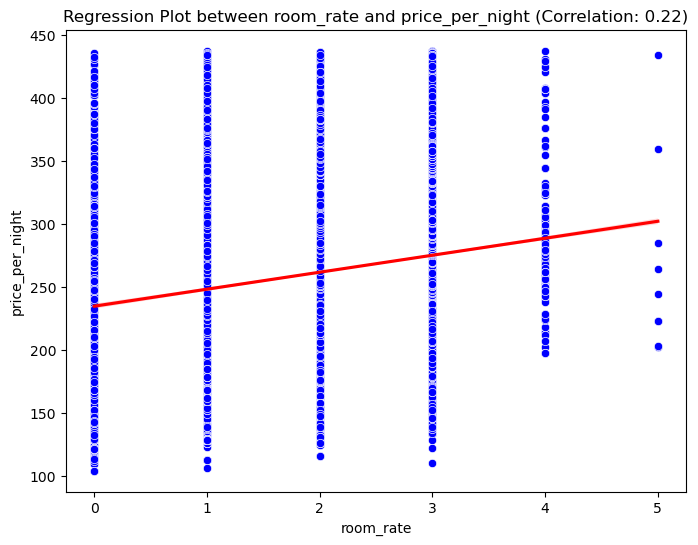

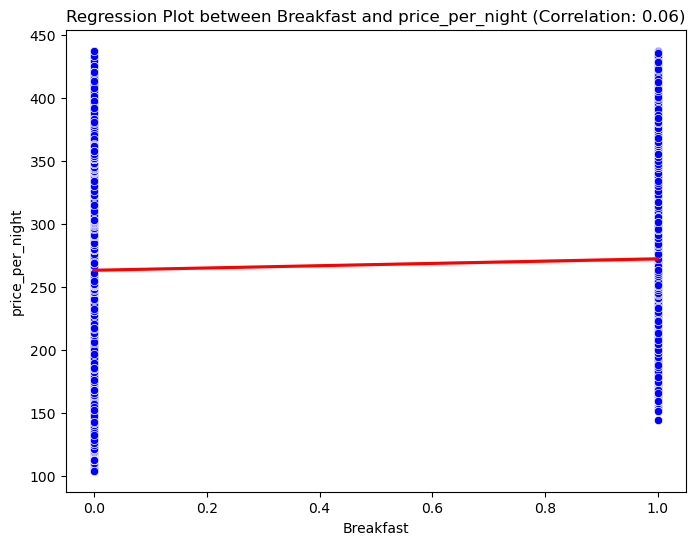

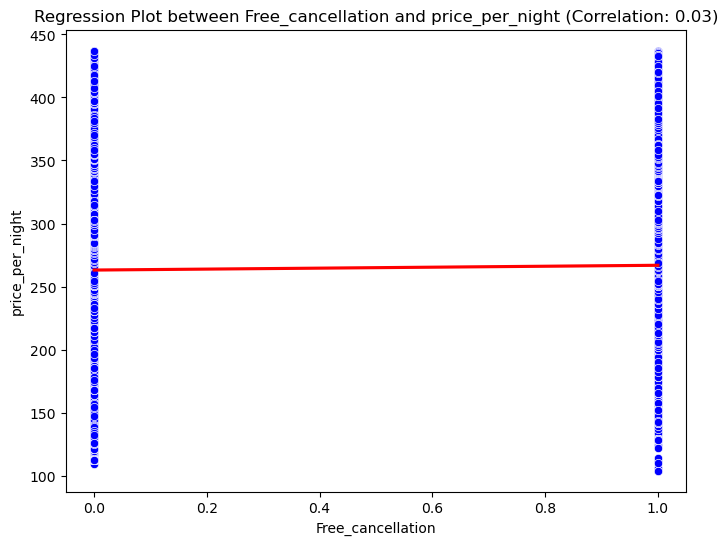

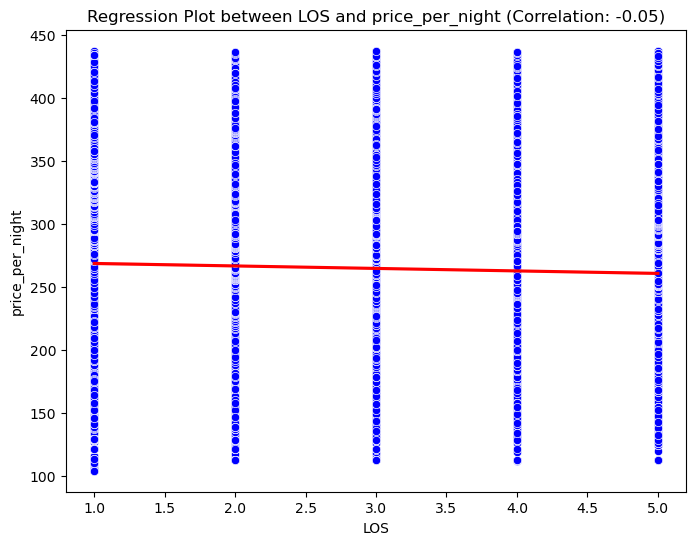

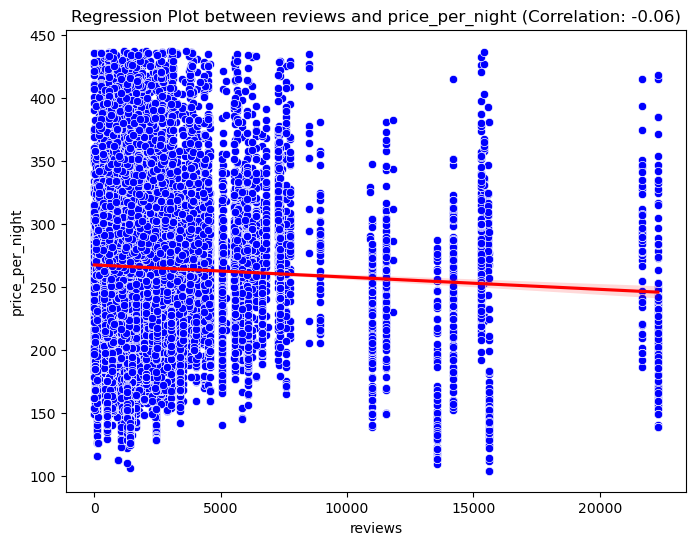

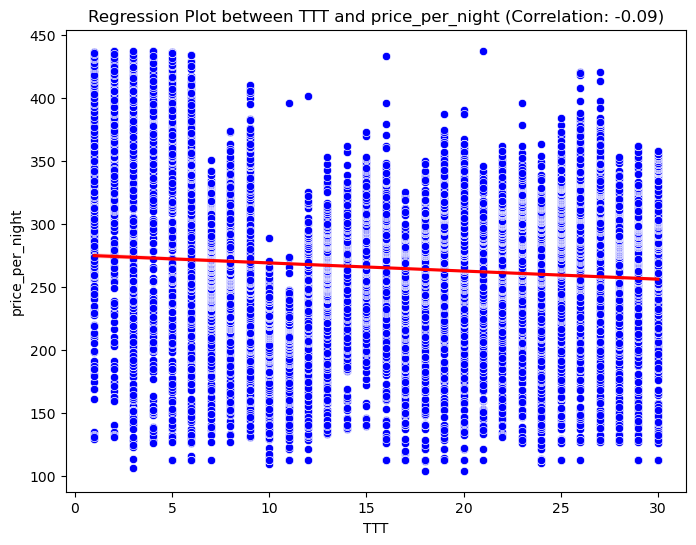

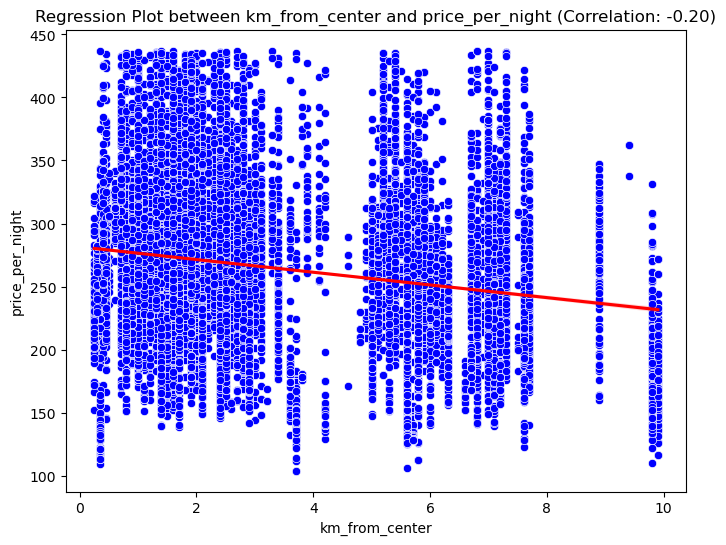

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Drop 'location_rating' and 'price' columns if they exist
df_temp = df.drop(columns=['location_rating', 'price', 'location', 'Limited_rooms', 'index'], errors='ignore')

# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=[float, int])

# Remove rows with null values in numeric columns
numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe
print("Data Types in Numeric DataFrame:")
print(numeric_df.dtypes)
print("\nFirst Few Rows of Numeric DataFrame:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Visualize the strong relationships
    # Identify strong correlations (e.g., correlation coefficient > 0.5 or < -0.5)
    strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].stack().reset_index()
    strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
    strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Plot the relationships for strong correlations
    for _, row in strong_correlations.iterrows():
        feature1 = row['Feature 1']
        feature2 = row['Feature 2']
        correlation = row['Correlation']
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=numeric_df, x=feature1, y=feature2, color='blue')
        sns.regplot(data=numeric_df, x=feature1, y=feature2, scatter=False, color='red')
        plt.title(f'Regression Plot between {feature1} and {feature2} (Correlation: {correlation:.2f})')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

    # Specifically visualize the relationship between 'price_per_night' and other parameters
    if 'price_per_night' in numeric_df.columns:
        price_correlations = correlation_matrix['price_per_night'].sort_values(ascending=False)
        print("Price per Night Correlations:")
        print(price_correlations)

        # Plot the relationships for 'price_per_night'
        for feature in price_correlations.index:
            if feature != 'price_per_night':
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=numeric_df, x=feature, y='price_per_night', color='blue')
                sns.regplot(data=numeric_df, x=feature, y='price_per_night', scatter=False, color='red')
                plt.title(f'Regression Plot between {feature} and price_per_night (Correlation: {price_correlations[feature]:.2f})')
                plt.xlabel(feature)
                plt.ylabel('price_per_night')
                plt.show()
    else:
        print("Column 'price_per_night' not found in the numerical columns.")


## Pairgrid 

Data Types in Numeric DataFrame:
score                float64
reviews              float64
star_rating          float64
Free_cancellation      int64
TTT                    int64
Breakfast              int64
km_from_center       float64
LOS                    int64
price_per_night      float64
room_rate              int64
dtype: object

First Few Rows of Numeric DataFrame:
   score  reviews  star_rating  Free_cancellation  TTT  Breakfast  \
0    5.6   2437.0          1.0                  0    1          0   
2    7.4   1978.0          2.0                  0    1          0   
3    3.5   1406.0          1.0                  0    1          0   
4    6.6  13556.0          3.0                  0    1          0   
5    4.4     97.0          3.0                  0    1          0   

   km_from_center  LOS  price_per_night  room_rate  
0            5.70    1            129.0          1  
2            3.10    1            161.0          1  
3            5.60    1            189.0          1 

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

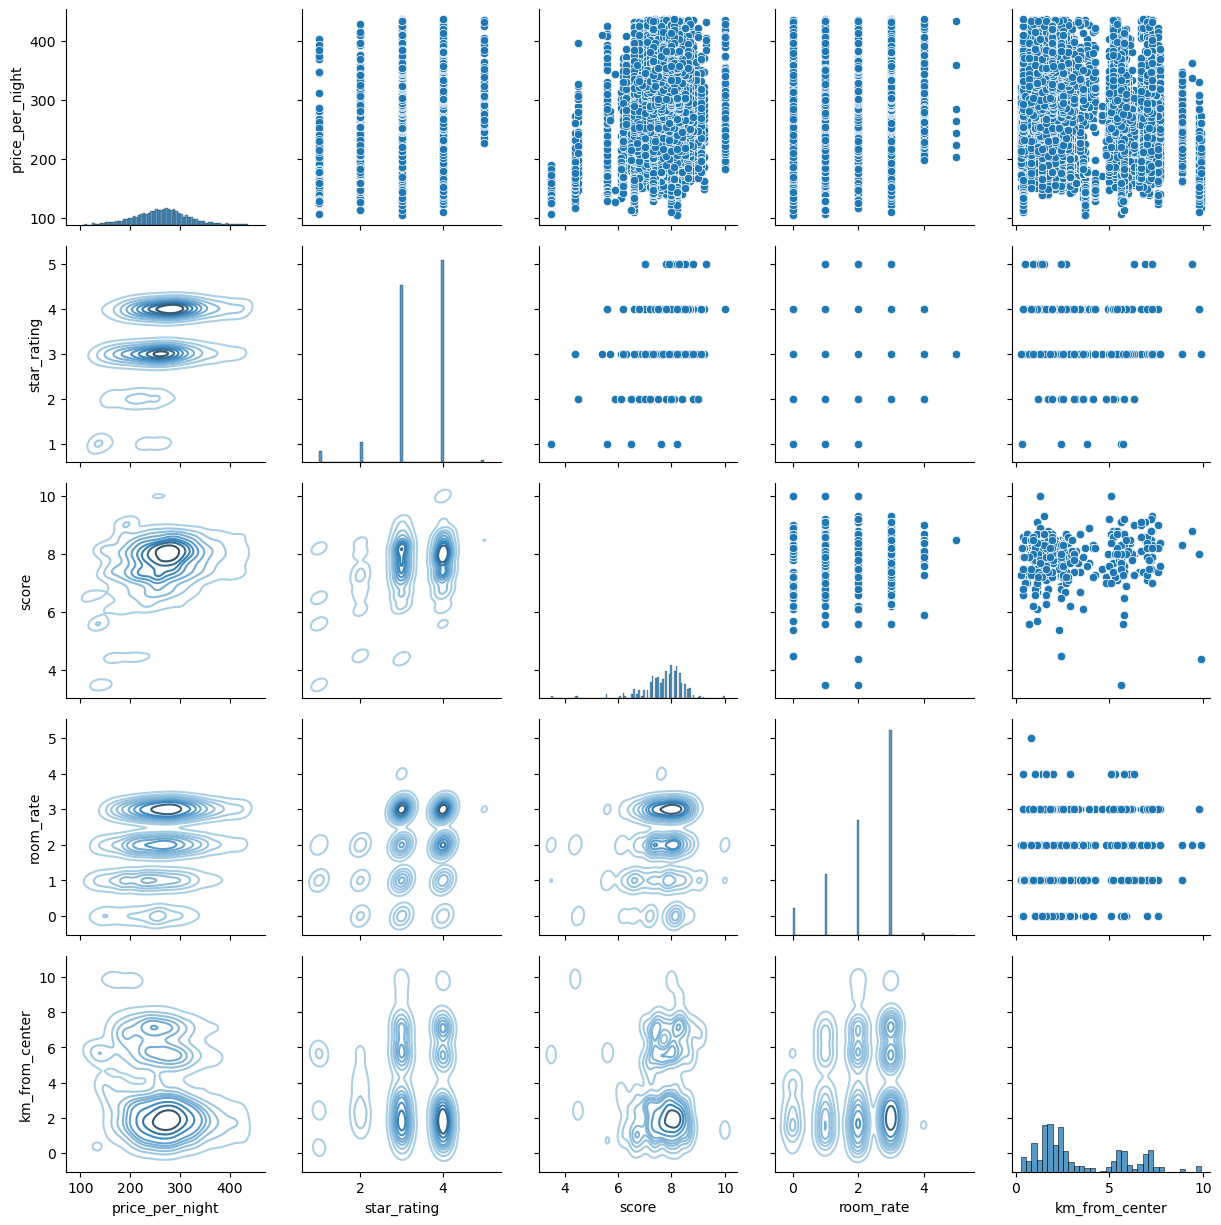

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Drop 'location_rating' and 'price' columns if they exist
df_temp = df.drop(columns=['location_rating', 'price','location','Limited_rooms','index'], errors='ignore')


# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=[float, int])

# Remove rows with null values in numeric columns
numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe
print("Data Types in Numeric DataFrame:")
print(numeric_df.dtypes)
print("\nFirst Few Rows of Numeric DataFrame:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Create a PairGrid to visualize pairwise relationships
    selected_features = ['price_per_night', 'star_rating', 'score', 'room_rate', 'km_from_center']
    g = sns.PairGrid(numeric_df, vars=selected_features)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_diag(sns.histplot, kde_kws={'color': 'k'})
    plt.show()

,star_rating,price_per_night
0,1.0,198.022892
1,2.0,218.701135
2,3.0,254.830620
3,4.0,281.093933
4,5.0,311.806116


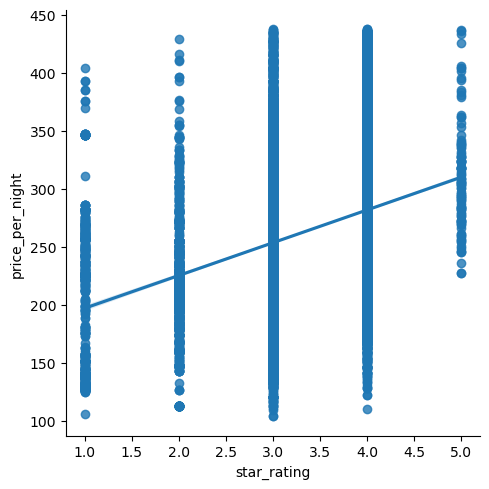

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')
sns.lmplot(x='star_rating',y='price_per_night',data=df)


# Remove hotels that do not have a star rating
data_filtered = df.dropna(subset=['star_rating'])

# Group by star_rating and calculate the average price per night
average_prices = data_filtered.groupby('star_rating')['price_per_night'].mean().reset_index()

# Display the results
average_prices

### Here you can see that there really is a kind of pattern in the increase of the average price between the star rating levels of the hotel. For each level of hotel starting from one star, the average price per night increases by approximately 30 dollars

# Visualizing the Relationship Between Hotel Scores and Prices for Different Star Ratings

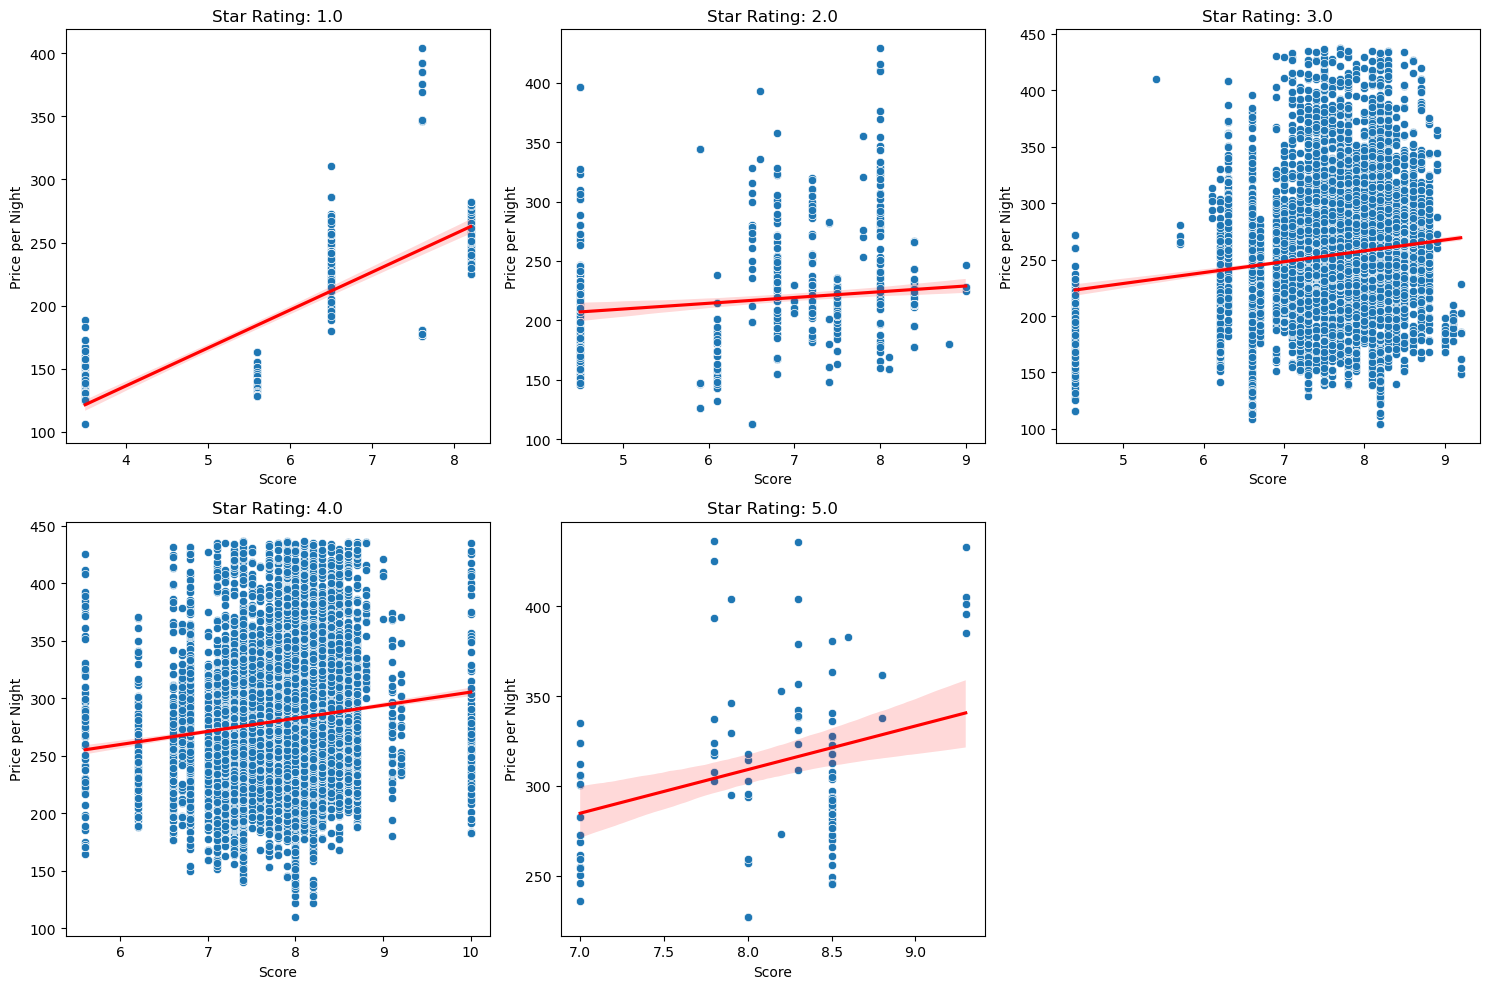

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Filter out hotels without a star rating
data_filtered = data.dropna(subset=['star_rating'])

# Get unique star ratings
unique_star_ratings = sorted(data_filtered['star_rating'].unique())

# Create subplots with regression lines
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = data_filtered[data_filtered['star_rating'] == star]
    sns.scatterplot(x='score', y='price_per_night', data=star_data)
    sns.regplot(x='score', y='price_per_night', data=star_data, scatter=False, color='red',h)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Score')
    plt.ylabel('Price per Night')

plt.tight_layout()
plt.show()


### General Insights

### There is a positive correlation between score and price per night for 1-star hotels. As the score increases, the price per night tends to increase.

### Weak Correlation: The correlation is weak for 3 and 4-star hotels, meaning other factors might also significantly influence the price.
### No Correlation: For 2-star hotels, the score does not seem to impact the price per night significantly.

### The wide confidence interval suggests that there is considerable uncertainty about the precise nature of the relationship between score and price per night for 5-star hotels.
### It indicates that while there is a general positive trend (as shown by the positive slope), the exact increase in price for a given increase in score is not highly predictable.

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

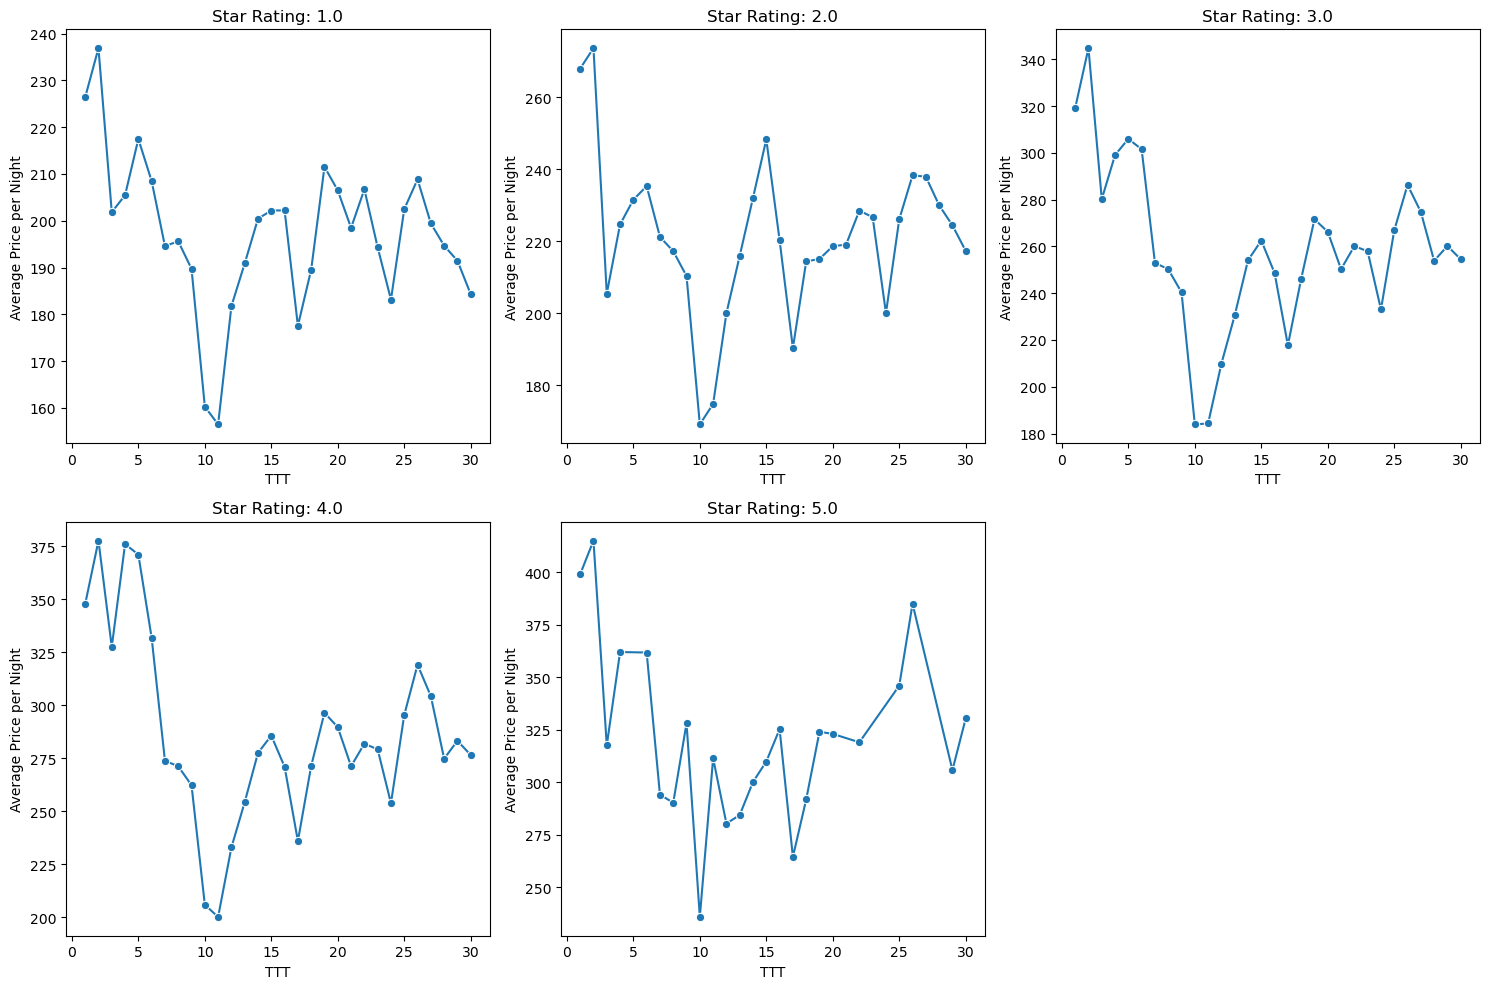

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Remove hotels that do not have a star rating
data_filtered = df.dropna(subset=['star_rating'])

# Group by star_rating and TTT, then calculate the average price per night
average_prices_ttt = data_filtered.groupby(['star_rating', 'TTT'])['price_per_night'].mean().reset_index()

# Plot the relationship
plt.figure(figsize=(15, 10))

unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_ttt[average_prices_ttt['star_rating'] == star]
    sns.lineplot(x='TTT', y='price_per_night', data=star_data, marker='o')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('TTT')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()


###  Here you can see the relationship for each group (groups divided by star_rating as before) between the TTT and the average price per night. It seems clear. It is most profitable to book your vacation 10 days in advance.
### In addition, you can clearly see that 25 days in advance there is a peak in the price that approaches the levels of only one day in advance!

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


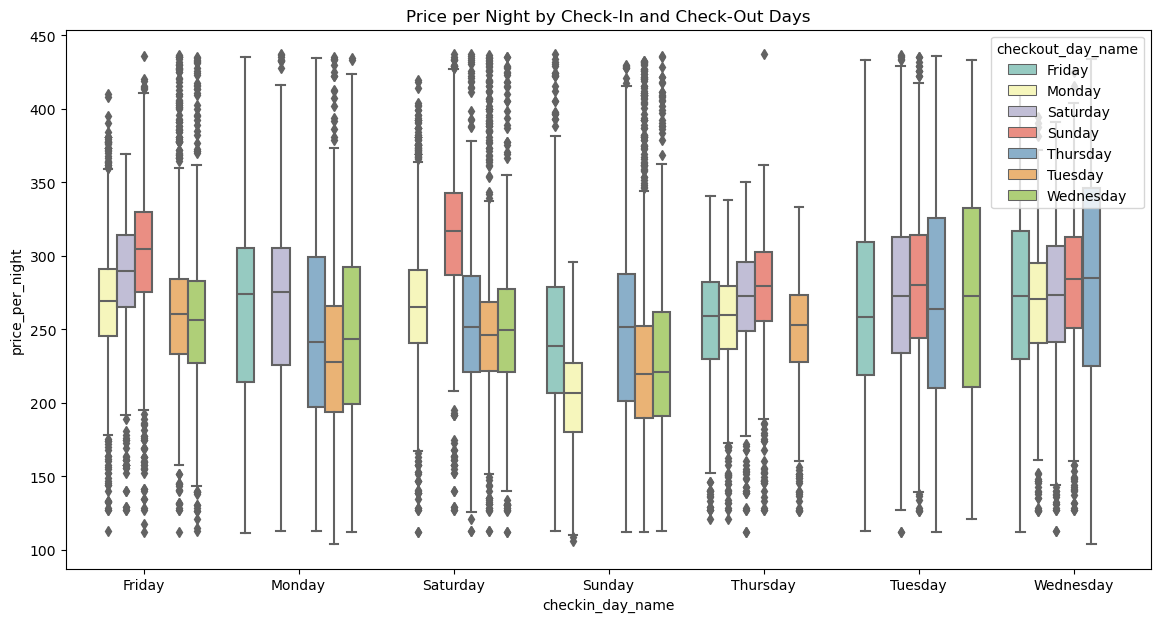

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


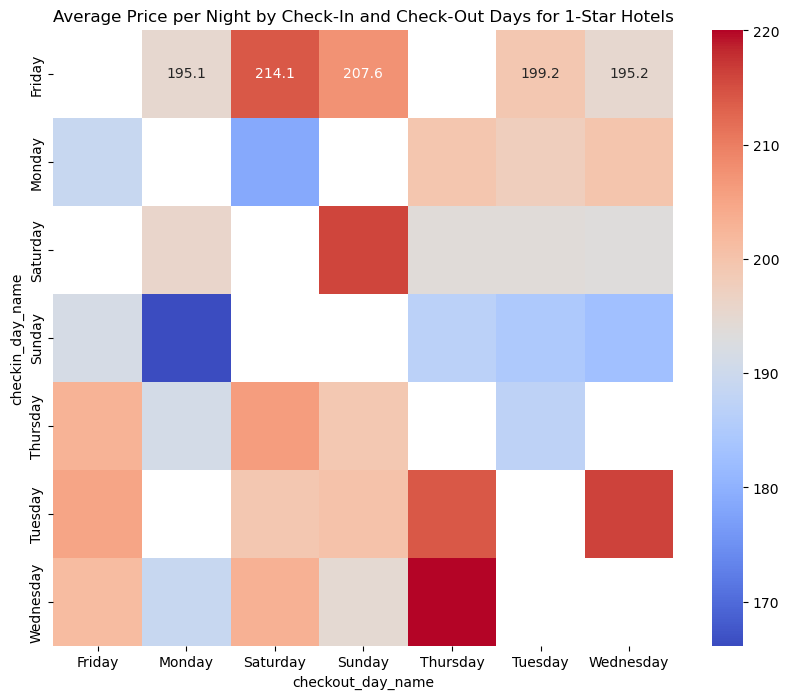

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


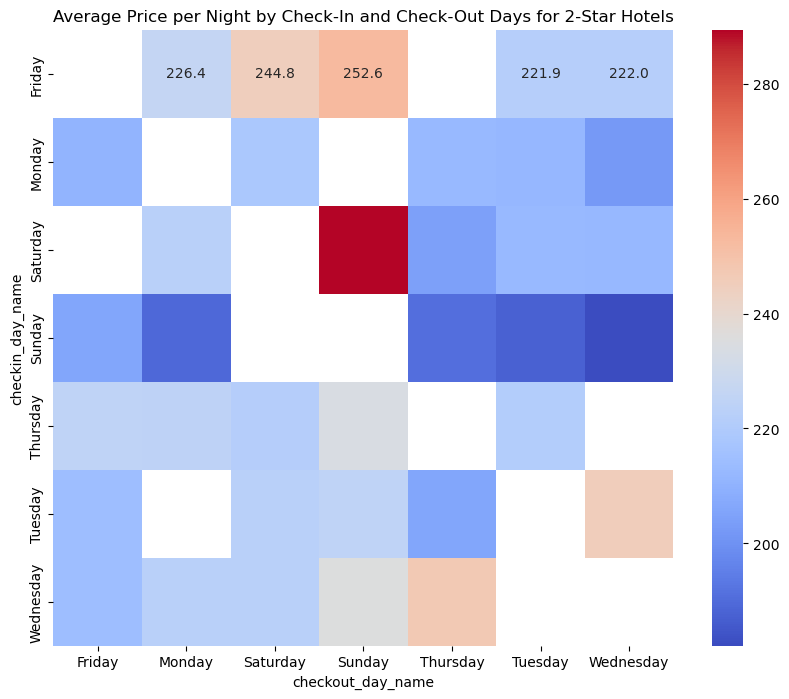

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


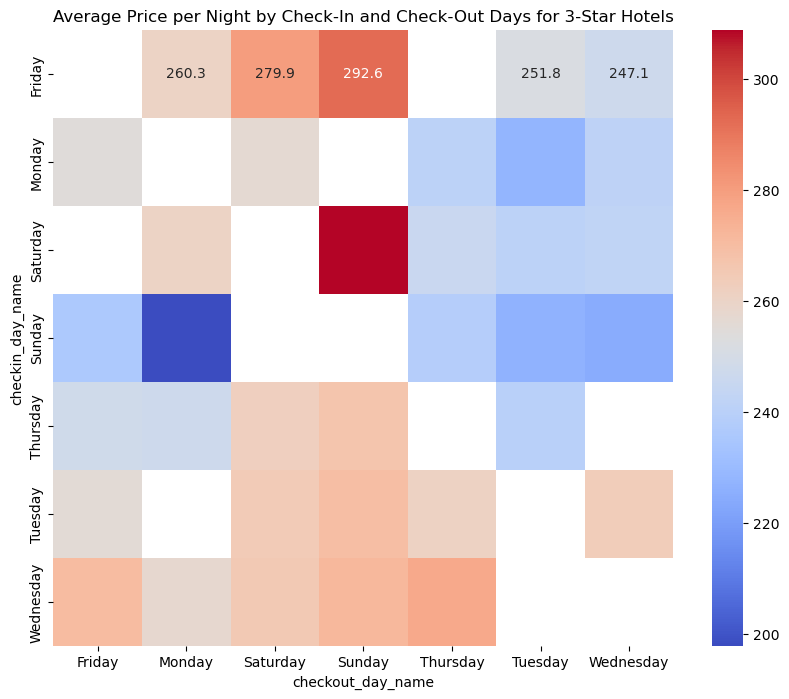

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


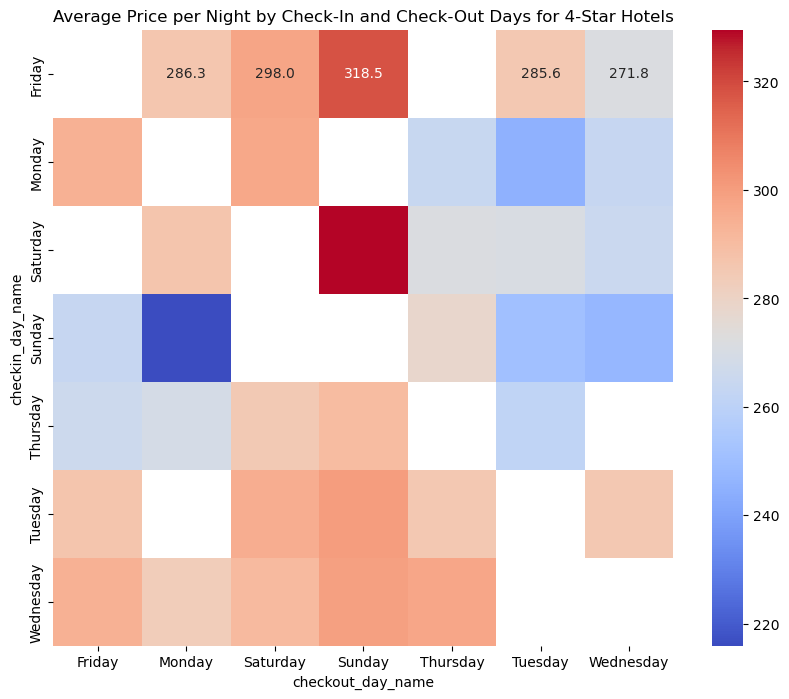

C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


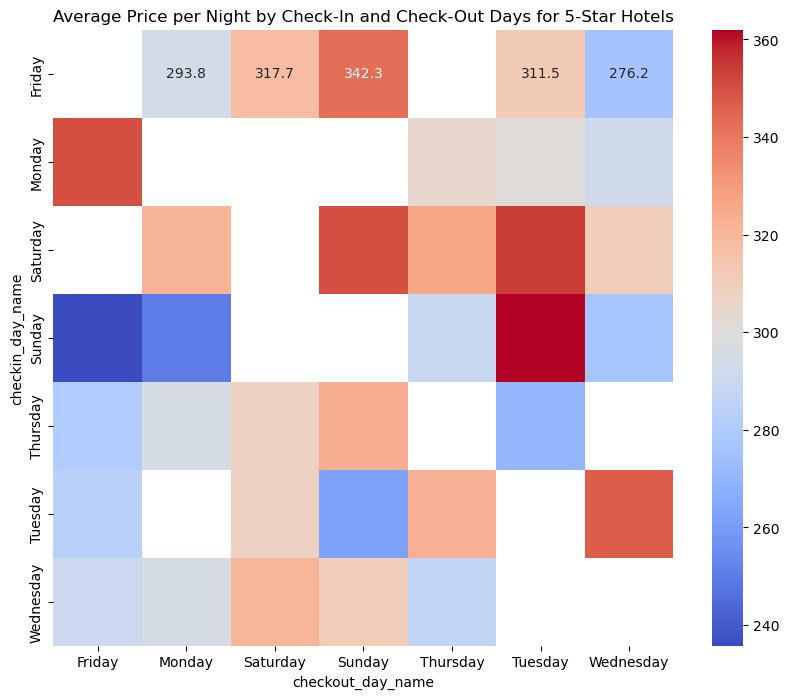

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')


# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Identify and handle outliers in 'price_per_night'
df['price_per_night'] = pd.to_numeric(df['price_per_night'], errors='coerce')

# Remove rows where 'price_per_night' is less than a reasonable minimum price (e.g., $10)
df = df[df['price_per_night'] > 10]

# Visualize the relationship between check-in and check-out days with price per night
plt.figure(figsize=(14, 7))
sns.boxplot(x='checkin_day_name', y='price_per_night', hue='checkout_day_name', data=df, palette='Set3')
plt.title('Price per Night by Check-In and Check-Out Days')
plt.show()

# Prepare data for heatmaps based on star ratings
star_ratings = [1, 2, 3, 4, 5]
heatmap_data = {}
for star in star_ratings:
    heatmap_data[star] = df[df['star_rating'] == star].pivot_table(index='checkin_day_name', columns='checkout_day_name', values='price_per_night', aggfunc='mean')

# Create heatmaps for each star rating with annotations
for star in star_ratings:
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(heatmap_data[star], annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
    plt.title(f'Average Price per Night by Check-In and Check-Out Days for {star}-Star Hotels')
    plt.show()

# Optionally, save the updated DataFrame to a new CSV file
df.to_csv('./20_06_hotels_data_cleaned_with_new_parameters.csv', index=False)

In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('./20_06_cleaned_booking_hotels_with_period.csv', index=False)

# Display the first few rows of the updated DataFrame
print(df.head())



                 name  location  score  reviews  \
0  U.S. Pacific Hotel       NaN    5.6   2437.0   
1     Hudson Yard 408       NaN    4.9     42.0   
2  Carlton Arms Hotel       NaN    7.4   1978.0   
3  Bowery Grand Hotel       NaN    3.5   1406.0   
4      West Side YMCA       NaN    6.6  13556.0   

                                   room_type  \
0                Standard Double (No Window)   
1                                Double Room   
2           Double Room with Shared Bathroom   
3  Standard Single Room with Shared Bathroom   
4         Bunk Bed Room with Shared Bathroom   

                                            bed_type  price  \
0   New YorkShow on map5.7 km from centreMetro ac...  129.0   
1   New YorkShow on map1.9 km from centreMetro ac...  158.0   
2   New YorkShow on map3.1 km from centreMetro ac...  161.0   
3   New YorkShow on map5.6 km from centreMetro ac...  189.0   
4   New YorkShow on map350 m from centreMetro access  169.0   

        availability     

C:\Users\ronro\AppData\Local\Temp\ipykernel_9240\466660270.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['period_of_the_month'] = pd.Categorical(df_filtered['period_of_the_month'], categories=period_order, ordered=True)
C:\Users\ronro\AppData\Local\Temp\ipykernel_9240\466660270.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=

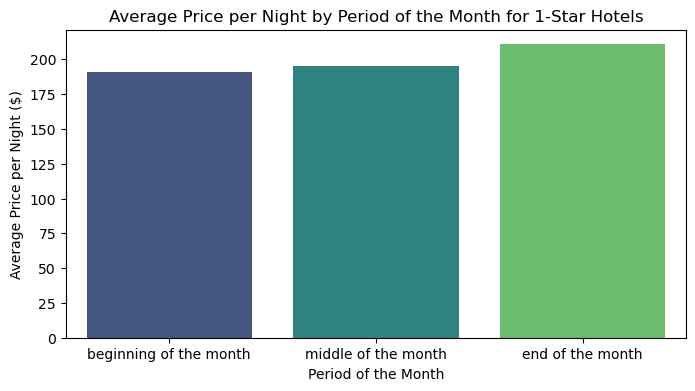

C:\Users\ronro\AppData\Local\Temp\ipykernel_9240\466660270.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


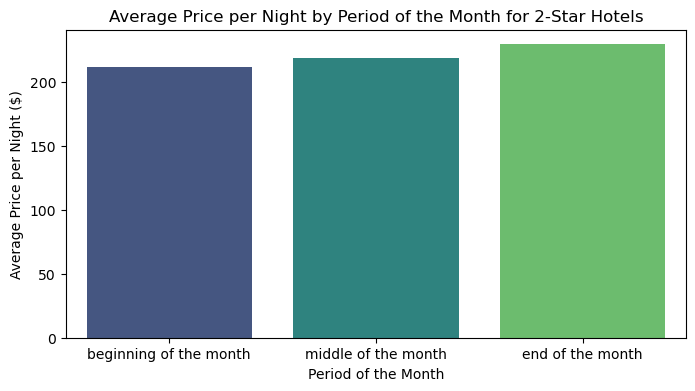

C:\Users\ronro\AppData\Local\Temp\ipykernel_9240\466660270.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


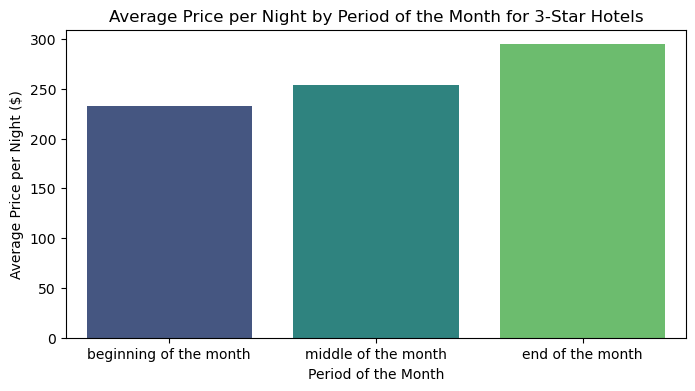

C:\Users\ronro\AppData\Local\Temp\ipykernel_9240\466660270.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


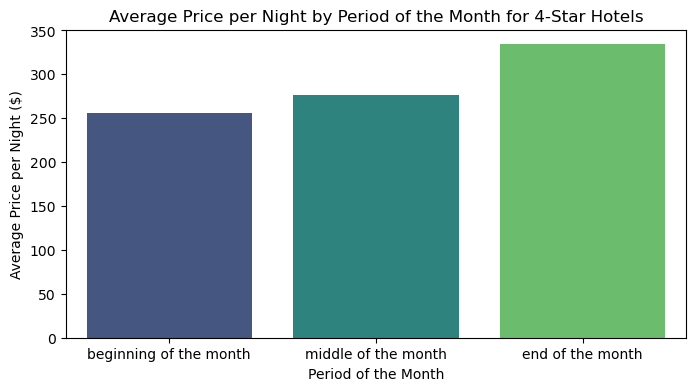

C:\Users\ronro\AppData\Local\Temp\ipykernel_9240\466660270.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()
C:\Users\ronro\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


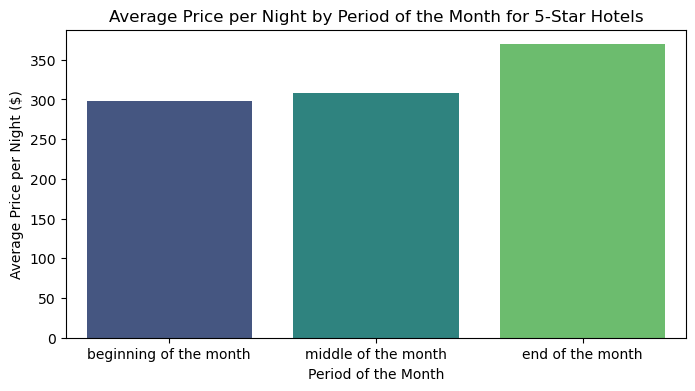

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated CSV file with the new period of the month
df = pd.read_csv('./20_06_cleaned_booking_hotels_with_period.csv')

# Remove hotels that do not have a star rating
df_filtered = df.dropna(subset=['star_rating'])

# Sort periods to ensure they appear in a logical order in the plot
period_order = ['beginning of the month', 'middle of the month', 'end of the month']
df_filtered['period_of_the_month'] = pd.Categorical(df_filtered['period_of_the_month'], categories=period_order, ordered=True)

# Create a list of unique star ratings
star_ratings = df_filtered['star_rating'].unique()

# Create plots for each star rating
for star in sorted(star_ratings):
    df_star = df_filtered[df_filtered['star_rating'] == star]
    average_prices_period = df_star.groupby('period_of_the_month')['price_per_night'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x='period_of_the_month', y='price_per_night', data=average_prices_period, palette='viridis')
    plt.title(f'Average Price per Night by Period of the Month for {int(star)}-Star Hotels')
    plt.xlabel('Period of the Month')
    plt.ylabel('Average Price per Night ($)')
    plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the CSV file
df = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters.csv')

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Perform one-hot encoding for 'checkin_day_name', 'checkout_day_name', and 'period_of_the_month'
checkin_encoder = OneHotEncoder(sparse=False)
encoded_checkin = checkin_encoder.fit_transform(df[['checkin_day_name']])

checkout_encoder = OneHotEncoder(sparse=False)
encoded_checkout = checkout_encoder.fit_transform(df[['checkout_day_name']])

period_encoder = OneHotEncoder(sparse=False)
encoded_period = period_encoder.fit_transform(df[['period_of_the_month']])

# Create DataFrames for the encoded columns
encoded_checkin_df = pd.DataFrame(encoded_checkin, columns=checkin_encoder.get_feature_names_out(['checkin_day_name']))
encoded_checkout_df = pd.DataFrame(encoded_checkout, columns=checkout_encoder.get_feature_names_out(['checkout_day_name']))
encoded_period_df = pd.DataFrame(encoded_period, columns=period_encoder.get_feature_names_out(['period_of_the_month']))

# Drop the original columns and concatenate the new one-hot encoded columns
df = df.drop(columns=['checkin_day_name', 'checkout_day_name', 'period_of_the_month'])
df = df.join(encoded_checkin_df).join(encoded_checkout_df).join(encoded_period_df)

# Save the updated DataFrame to a new CSV file
output_file = './20_06_hotels_data_cleaned_with_new_parameters_encoded.csv'
df.to_csv(output_file, index=False)

# Display the first few rows of the updated DataFrame
print(df.head())


C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ronro\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                 name  location  score  reviews  \
0  U.S. Pacific Hotel       NaN    5.6   2437.0   
1     Hudson Yard 408       NaN    4.9     42.0   
2  Carlton Arms Hotel       NaN    7.4   1978.0   
3  Bowery Grand Hotel       NaN    3.5   1406.0   
4      West Side YMCA       NaN    6.6  13556.0   

                                   room_type  \
0                Standard Double (No Window)   
1                                Double Room   
2           Double Room with Shared Bathroom   
3  Standard Single Room with Shared Bathroom   
4         Bunk Bed Room with Shared Bathroom   

                                            bed_type  price  \
0   New YorkShow on map5.7 km from centreMetro ac...  129.0   
1   New YorkShow on map1.9 km from centreMetro ac...  158.0   
2   New YorkShow on map3.1 km from centreMetro ac...  161.0   
3   New YorkShow on map5.6 km from centreMetro ac...  189.0   
4   New YorkShow on map350 m from centreMetro access  169.0   

        availability     